In [12]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split


FILE_PATH = './student-mat.csv'

df = pd.read_csv(FILE_PATH, sep=';', skiprows=0, header=None)
df.set_axis(df.iloc[0], axis=1, inplace=True)
df = df[1:]
df.rename(columns={'Fedu':'father_edu','Medu':'mother_edu','G3':'final_grade','romantic':'relationship'},inplace=True)

features = ['father_edu', 'mother_edu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'higher', 'internet', 'relationship', 'goout', 'Dalc', 'Walc', 'absences', 'final_grade']
data = df[features]

categorical_cols = data.select_dtypes(include='object').columns

for col in categorical_cols:
  data[col] = data[col].replace({'yes': 1, 'no': 0})

data[list(features)] = data[list(features)].astype(float)

X = data.drop('final_grade', axis=1)
Y = data['final_grade']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Gradient Descent parameters
learning_rate = 0.001
num_iterations = 100000

# Initialize bias and weights with small random values
def initialize(num_features):
  bias = random.random() * 0.01
  weights = np.random.randn(num_features) * 0.01
  return bias, weights

# Predict the output based on current bias and weights
def predict_y(bias, weights, X):
  X_values = np.array(X)
  return bias + np.dot(X_values, weights)

# Mean Squared Error (MSE) cost function
def get_cost(Y, Y_hat):
  Y_res = Y - Y_hat
  return np.mean(Y_res ** 2)

# Update bias and weights using gradient descent update rule
def update(X, Y, Y_hat, old_bias, old_weights, learning_rate):
  db = (np.mean(Y_hat - Y) * 2)
  dw = (np.dot((Y_hat - Y), X) * 2) / len(Y)
  new_bias = old_bias - learning_rate * db
  new_weights = old_weights - learning_rate * dw
  return new_bias, new_weights

# Gradient Descent algorithm
def gradient_descent(X, Y, learning_rate, num_iterations):
  bias, weights = initialize(X.shape[1])
  mse_history = pd.DataFrame(columns=['iteration','cost'])
  array_index = 0
  for iteration in range(num_iterations):
    Y_hat = predict_y(bias, weights, X)
    cost = get_cost(Y, Y_hat)
    bias, weights = update(X, Y, Y_hat, bias, weights, learning_rate)
    if iteration % 10 == 0:
      mse_history.loc[array_index]=[iteration,cost]
      array_index += 1
    #print(f"Iteration: {iteration}, Cost: {cost}")
  return mse_history, bias, weights

mse_history, bias, weights = gradient_descent(X_train, Y_train, learning_rate, num_iterations)
print(mse_history)
mse_history, bias, weights = gradient_descent(X_test, Y_test, learning_rate, num_iterations)
#print(mse_history[-1])

/var/folders/sd/3vwbbsq14yx8lkq17z7cnnmr0000gn/T/ipykernel_75831/797915773.py:10: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(df.iloc[0], axis=1, inplace=True)
/var/folders/sd/3vwbbsq14yx8lkq17z7cnnmr0000gn/T/ipykernel_75831/797915773.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].replace({'yes': 1, 'no': 0})
/var/folders/sd/3vwbbsq14yx8lkq17z7cnnmr0000gn/T/ipykernel_75831/797915773.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

      iteration        cost
0           0.0  124.161886
1          10.0   39.844040
2          20.0   29.540868
3          30.0   25.653771
4          40.0   24.088444
...         ...         ...
9995    99950.0   16.353752
9996    99960.0   16.353751
9997    99970.0   16.353750
9998    99980.0   16.353749
9999    99990.0   16.353748

[10000 rows x 2 columns]


Text(0, 0.5, 'Cost of MSE')

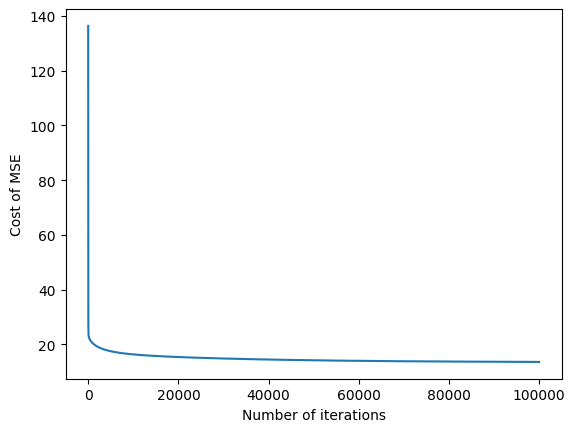

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(mse_history['iteration'], mse_history['cost'])
plt.xlabel('Number of iterations')
plt.ylabel('Cost of MSE')